Trains a simple deep NN on the IRIS dataset.



In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

In [2]:
batch_size = 50
num_classes = 3
epochs = 200

In [3]:
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")
iris

--2021-11-30 07:13:31--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2021-11-30 07:13:31 (317 MB/s) - ‘iris0.csv’ saved [3730/3730]



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Shuffling
iriss=iris.sample(frac=1).reset_index(drop=True)
iris_train=iriss.iloc[0:100,:]
iris_test=iriss.iloc[100:150,:]

x_train=iris_train.iloc[:,0:4].values
x_test=iris_test.iloc[:,0:4].values
y_train=iris_train.iloc[:,4:5]
y_test=iris_test.iloc[:,4:5]
y_test

,Species
100,versicolor
101,virginica
102,setosa
103,virginica
104,virginica
105,setosa
106,versicolor
107,versicolor
108,virginica
109,virginica


In [5]:

sets=iris.iloc[:,4:5].drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_train=[ encoder[i] for i in y_train["Species"].tolist() ]
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test=[ encoder[i] for i in y_test["Species"].tolist() ]
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(100, 4) (100, 3) (50, 4) (50, 3)


In [20]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(4,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.save('tmp.h5')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Test loss: 0.1792486160993576
Test accuracy: 0.9800000190734863
## training loss and acc ##


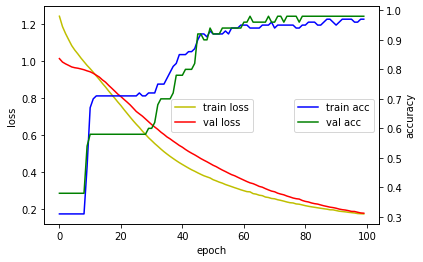

In [22]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.8857316374778748
Test accuracy: 0.5799999833106995
## training loss and acc ##


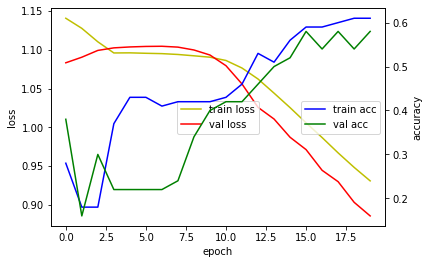

In [10]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.7273895740509033
Test accuracy: 0.5799999833106995
## training loss and acc ##


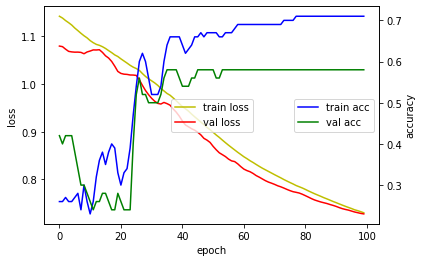

In [11]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


In [12]:
hist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Test loss: 1.1087141036987305
Test accuracy: 0.20000000298023224
## training loss and acc ##


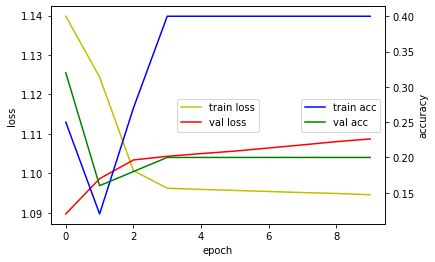

In [13]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.1291176080703735
Test accuracy: 0.20000000298023224
## training loss and acc ##


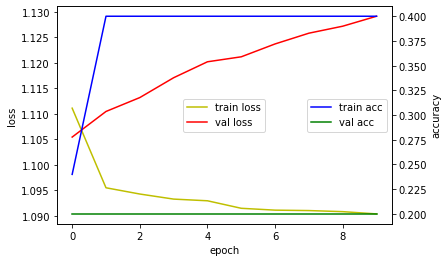

In [14]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.09257173538208
Test accuracy: 0.20000000298023224
## training loss and acc ##


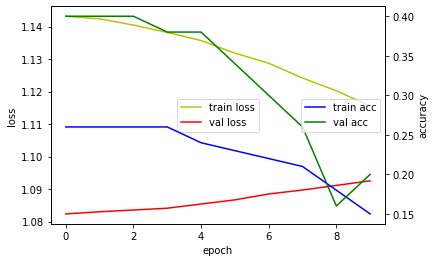

In [15]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.0941373109817505
Test accuracy: 0.18000000715255737
## training loss and acc ##


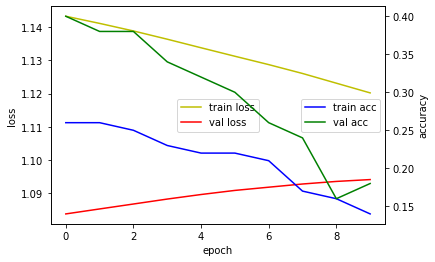

In [16]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.1300654411315918
Test accuracy: 0.20000000298023224
## training loss and acc ##


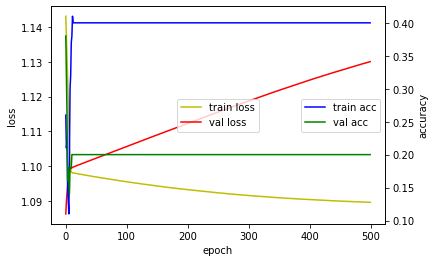

In [17]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=500,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.1395957469940186
Test accuracy: 0.20000000298023224
## training loss and acc ##


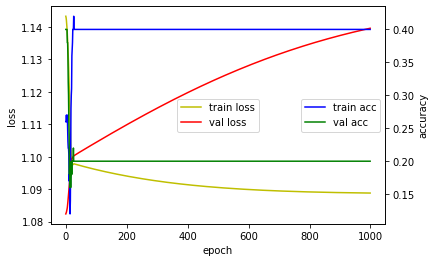

In [18]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Epoch 1/10
2/2 [==============================] - 0s 61ms/step - loss: 1.1433 - accuracy: 0.2600 - val_loss: 1.0817 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 1.1416 - accuracy: 0.2600 - val_loss: 1.0807 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 1.1380 - accuracy: 0.2600 - val_loss: 1.0829 - val_accuracy: 0.3800
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 1.1329 - accuracy: 0.2400 - val_loss: 1.0874 - val_accuracy: 0.3200
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 1.1242 - accuracy: 0.2200 - val_loss: 1.0911 - val_accuracy: 0.1800
Epoch 6/10
2/2 [==============================] - 0s 26ms/step - loss: 1.1148 - accuracy: 0.1500 - val_loss: 1.0955 - val_accuracy: 0.1600
Epoch 7/10
2/2 [==============================] - 0s 27ms/step - loss: 1.1037 - accuracy: 0.2200 - val_loss: 1.0993 - val_accuracy: 0.1800
Epoch 8/10
2/2 [===========

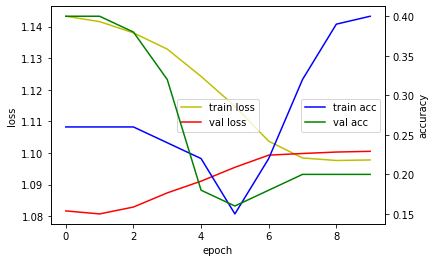

In [19]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=90,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.4137970209121704
Test accuracy: 0.8999999761581421
## training loss and acc ##


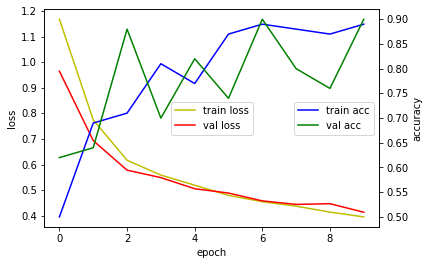

In [ ]:
# adam

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.3647236227989197
Test accuracy: 0.8999999761581421
## training loss and acc ##


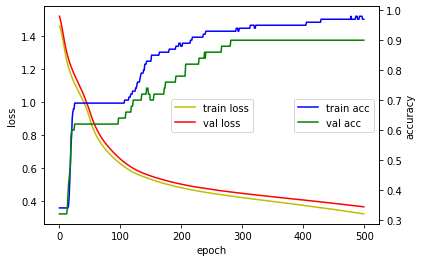

In [ ]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=500,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.2756430506706238
Test accuracy: 0.8999999761581421
## training loss and acc ##


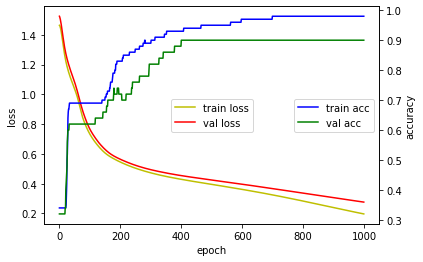

In [ ]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)
